In [5]:
# Imports
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('../../src/')
from plothelpers import *
from MinimalNamingGame import *
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'sample', 'mean', 'flatten', 'choice', 'entropy', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Preprocess

In [7]:
# Load all data
res = load_MNG_simulation('../../results/MNG01/', 'MNG01')

In [40]:
t_convs = (res['num_unique_words'][:,1:] == 1).argmax(axis=1) + 1
t_convs = t_convs
t_conv = t_convs.mean()
t_maxs = res['num_words'].argmax(axis=1)
t_max = t_maxs.mean()

In [7]:
# Export to Pandas DataFrame
df = pd.DataFrame([
    array(res['num_unique_words']).mean(axis=0),
    array(res['num_unique_words']).std(axis=0),
    array(res['num_words']).mean(axis=0),
    array(res['num_words']).std(axis=0),
    array(res['successes']).mean(axis=0),
    array(res['successes']).std(axis=0),
]).T

df.columns = pd.MultiIndex.from_tuples([
    ['num_unique_words', 'mean'],
    ['num_unique_words', 'std'],
    ['num_words', 'mean'],
    ['num_words', 'std'],
    ['successes', 'mean'],
    ['successes', 'std']
])

df.index = arange(0, res['params']['T'], res['params']['res'])

In [8]:
# Save
df.to_csv('MNG01-plotdata.csv')

# Plot

In [4]:
# Load data
data = pd.read_csv('MNG01-plotdata.csv', header=[0,1], index_col=0)
params = load_MNG_simulation('', 'MNG01', params_only=True)

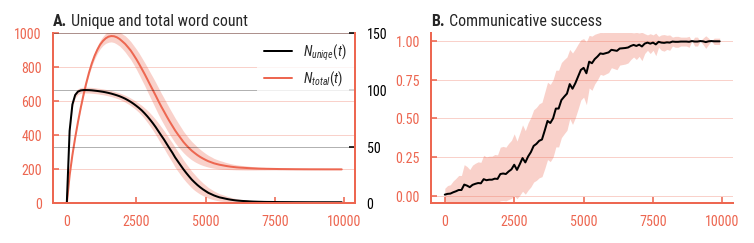

In [55]:
#Plot
figure(figsize=(cm2inch(12,3)))
xs = arange(0, params['T'], params['res'])

# Total word count
if True:
    ax1 = subplot(121)
    mean = data['num_words']['mean']
    std = data['num_words']['std']
    plot(xs, mean, '#ed6751')
    fill_between(xs, mean+.5*std, mean-.5*std, 
                 alpha=.3, facecolor='#ed6751', edgecolor='#ffffff')
    ylim(0,1000)
    

# Unique word count
if True:
    ax2 = ax1.twinx()
    mean = data['num_unique_words']['mean']
    std = data['num_unique_words']['std']
    plot(xs, mean, 'k', label='$N_{uniqe}(t)$')
    fill_between(xs, mean+.5*std, mean-.5*std, 
                 alpha=.3, facecolor='#ed6751', edgecolor='#ffffff')

    ax2.plot([0], [0], '#ed6751', label='$N_{total}(t)$')
    ax2.tick_params('y', colors='k')
    ylim(0,150)
    for line in ax2.yaxis.get_gridlines():
        line.set_color('k')
    title('Unique and total word count')
    legend()

# Comm success
if True:
    ax3 = subplot(122)
    mean = data['successes']['mean']
    std = data['successes']['std']
    plot(xs, mean, 'k')
    fill_between(xs, mean+.5*std, mean-.5*std, 
                 alpha=.3, facecolor='#ed6751', edgecolor='#ffffff')
    title('Communicative success')
    ylim(-.05, 1.05)

restyle_title(ax2, ax3)
for ax in [ax1, ax2, ax3]:
    ax.locator_params(nbins=5, axis='y')
    ax.locator_params(nbins=5, axis='x')
    ax.yaxis.grid()  
sns.despine(ax=ax1, top=True)
sns.despine(ax=ax2, top=True, right=False)
sns.despine(ax=ax3)


subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=.25)
# savefig('MNG01-results.pdf', bbox_inches='tight')
# copyfig('MNG01-results.pdf')